In [1]:
import pandas as pd
import json
from urllib.request import urlopen 
import yfinance as yf 
from datetime import datetime 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from string import ascii_letters
import matplotlib as matplot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from pandas.plotting import register_matplotlib_converters
import requests
import pandas_datareader as web

In [2]:
#Pulling Bitcoin's price history

btc_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=2000&api_key=d1875a3943f6f2ee83a90ac2e05d5fa018618e00724e9018f9bd08c0ac932cc6"
btc_data = urlopen(btc_url).read() #Open the API contents 
btc_json = json.loads(btc_data) #Transform the contents of our response into a manageable JSON format


In [3]:
#Transform Bitcoin data so we can run analysis

btc_price = btc_json['Data']['Data'] ##Extract only the relevant data from the JSON variable we created earlier
btc_df = pd.DataFrame(btc_price) ##Convert the json format into a Pandas dataframe so we can make it easier to work with


In [4]:
btc_df['btc_returns'] = ((btc_df['close']/btc_df['open']) - 1) * 100 #We create a coloumn for daily returns of Bitcoin that we'll need for later when we calculate the correlation. 
btc_df['Date'] = btc_df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d')) #Formatting the date into a human-readable format
# btc_df.set_index("Date", drop = True, inplace = True)
btc_df.set_index(pd.to_datetime(btc_df['Date'], infer_datetime_format=True), inplace=True)


In [5]:
btc_returns = btc_df[['btc_returns']] #In this line, we select the only 2 columns we'll need for our correlation calculations namely the Date and the Return
# btc_returns.set_index("Date", drop = True, inplace = True)
btc_returns = btc_returns.dropna()
btc_returns.head()

,btc_returns
Date,
2016-02-10,1.747842
2016-02-11,-0.636326
2016-02-12,1.209646
2016-02-13,1.577961
2016-02-14,3.947706


In [6]:
#Pulling S&P500's price history

spy = yf.Ticker("SPY")
spy_df = spy.history(start="2019-01-01", end="2021-07-31")
spy_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,439.309998,441.029999,439.260010,441.019989,43719200,0.0,0
2021-07-27,439.910004,439.940002,435.989990,439.010010,67397100,0.0,0
2021-07-28,439.679993,440.299988,437.309998,438.829987,52472400,0.0,0
2021-07-29,439.820007,441.799988,439.809998,440.649994,47435300,0.0,0
2021-07-30,437.910004,440.059998,437.769989,438.510010,68890600,0.0,0


In [7]:
#Transform S&P500 data so we can run analysis

#spy_df = spy_df.reset_index() #In the original dataframe, the date is part of the index which means we can't select it later. reset_index shifts the date into a normal column
#spy_df['Date'] = spy_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d')) 
spy_df['spy_returns'] = ((spy_df['Close']/spy_df['Open']) - 1) * 100
spy_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,spy_returns
Date,,,,,,,,
2019-01-02,235.439211,240.445104,235.410497,239.459229,126925200,0.0,0,1.707455
2019-01-03,237.592780,237.918221,233.228188,233.745056,144140700,0.0,0,-1.619461
2019-01-04,236.980182,242.263641,236.578182,241.574493,142628800,0.0,0,1.938690
2019-01-07,241.861681,244.981978,240.904533,243.479263,103139100,0.0,0,0.668805
2019-01-08,245.814721,246.283714,243.115557,245.766846,102512600,0.0,0,-0.019476
...,...,...,...,...,...,...,...,...
2021-07-26,439.309998,441.029999,439.260010,441.019989,43719200,0.0,0,0.389245
2021-07-27,439.910004,439.940002,435.989990,439.010010,67397100,0.0,0,-0.204586
2021-07-28,439.679993,440.299988,437.309998,438.829987,52472400,0.0,0,-0.193324


In [8]:
spy_returns = spy_df[['spy_returns']]
spy_returns = spy_returns.dropna()
spy_returns.head()

,spy_returns
Date,
2019-01-02,1.707455
2019-01-03,-1.619461
2019-01-04,1.938690
2019-01-07,0.668805
2019-01-08,-0.019476


In [9]:
#Pulling gold's price history

gold = yf.Ticker("GC=F")
gold_df = gold.history(start="2019-01-01", end="2021-07-31")
gold_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,1802.500000,1802.500000,1797.199951,1798.699951,17,0,0
2021-07-27,1803.699951,1803.699951,1799.500000,1799.500000,1,0,0
2021-07-28,1799.500000,1799.500000,1799.500000,1799.500000,209783,0,0
2021-07-29,1806.599976,1832.599976,1806.099976,1831.199951,30496,0,0
2021-07-30,1828.000000,1830.500000,1808.900024,1812.599976,30496,0,0


In [10]:
#Transform gold data so we can run analysis

gold_df['gold_returns'] = ((gold_df['Close']/gold_df['Open']) - 1) * 100 
gold_returns = gold_df[['gold_returns']]
gold_returns = gold_returns.dropna()
gold_returns.tail()

,gold_returns
Date,
2021-07-26,-0.210821
2021-07-27,-0.232852
2021-07-28,0.000000
2021-07-29,1.361673
2021-07-30,-0.842452


In [11]:
#Pulling NASDAQs price history (QQQ)

qqq = yf.Ticker("QQQ")
qqq_df = qqq.history(start="2019-01-01", end="2021-07-31")
qqq_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,367.489990,368.890015,366.600006,368.489990,28438100,0.0,0
2021-07-27,368.220001,368.220001,360.160004,364.429993,57933100,0.0,0
2021-07-28,365.600006,367.450012,363.239990,365.829987,42066200,0.0,0
2021-07-29,365.250000,367.679993,365.250000,366.480011,25672500,0.0,0
2021-07-30,362.440002,365.170013,362.410004,364.570007,36463500,0.0,0


In [12]:
#Transform gold data so we can run analysis

# qqq_df = qqq_df.reset_index()
# qqq_df['Date'] = qqq_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
qqq_df['qqq_returns'] = ((qqq_df['Close']/qqq_df['Open']) - 1) * 100 
qqq_returns = qqq_df[['qqq_returns']]
qqq_returns = qqq_returns.dropna()
qqq_returns.tail()

,qqq_returns
Date,
2021-07-26,0.272116
2021-07-27,-1.029278
2021-07-28,0.062905
2021-07-29,0.336759
2021-07-30,0.587685


In [13]:
#Pulling Amazon price history

amzn = yf.Ticker("AMZN")
amzn_df = amzn.history(start="2019-01-01", end="2021-07-31")
amzn_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,3673.169922,3712.080078,3647.250000,3699.820068,2900100,0,0
2021-07-27,3698.500000,3698.500000,3586.149902,3626.389893,4131900,0,0
2021-07-28,3633.780029,3658.419922,3601.000000,3630.320068,2999400,0,0
2021-07-29,3627.750000,3637.949951,3580.010010,3599.919922,5520000,0,0
2021-07-30,3347.949951,3368.139893,3306.979980,3327.590088,9957100,0,0


In [14]:
#Transform Amazon data so we can run analysis

# amzn_df = amzn_df.reset_index()
# amzn_df['Date'] = amzn_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
amzn_df['amzn_returns'] = ((amzn_df['Close']/amzn_df['Open']) - 1) * 100 
amzn_returns = amzn_df[['amzn_returns']]
amzn_returns = amzn_returns.dropna()
amzn_returns.tail()

,amzn_returns
Date,
2021-07-26,0.725535
2021-07-27,-1.949712
2021-07-28,-0.095217
2021-07-29,-0.767144
2021-07-30,-0.608129


In [15]:
#Pulling Visa price history 

v = yf.Ticker("V")
v_df = v.history(start="2019-01-01", end="2021-07-31")
v_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,249.210007,250.360001,247.699997,250.250000,4879000,0.0,0
2021-07-27,249.190002,252.669998,248.220001,250.929993,7038300,0.0,0
2021-07-28,250.050003,251.500000,245.910004,246.940002,9036500,0.0,0
2021-07-29,248.110001,250.380005,247.100006,247.919998,7495300,0.0,0
2021-07-30,247.210007,248.460007,246.000000,246.389999,5804200,0.0,0


In [16]:
#Transform Visa data so we can run analysis

# v_df = v_df.reset_index()
# v_df['Date'] = v_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
v_df['v_returns'] = ((v_df['Close']/v_df['Open']) - 1) * 100 
v_returns = v_df[['v_returns']]
v_returns = v_returns.dropna()
v_returns.tail()

,v_returns
Date,
2021-07-26,0.417316
2021-07-27,0.698258
2021-07-28,-1.243751
2021-07-29,-0.076580
2021-07-30,-0.331705


In [17]:
#Pulling TESLA price history 

tsla = yf.Ticker("TSLA")
tsla_df = tsla.history(start="2019-01-01", end="2021-07-31")
tsla_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-26,650.969971,668.200012,647.109985,657.619995,25336600,0,0.0
2021-07-27,663.400024,666.500000,627.239990,644.780029,32813300,0,0.0
2021-07-28,647.000000,654.969971,639.400024,646.979980,16006600,0,0.0
2021-07-29,649.789978,683.690002,648.799988,677.349976,30394600,0,0.0
2021-07-30,671.760010,697.530029,669.000000,687.200012,29600500,0,0.0


In [18]:
#Transform TESLA data so we can run analysis

# tsla_df = tsla_df.reset_index()
# tsla_df = tsla_df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
tsla_df['tsla_returns'] = ((tsla_df['Close']/tsla_df['Open']) - 1) * 100 
tsla_returns = tsla_df[['tsla_returns']]
tsla_returns = tsla_returns.dropna()
tsla_returns.tail()

,tsla_returns
Date,
2021-07-26,1.021556
2021-07-27,-2.806752
2021-07-28,-0.003094
2021-07-29,4.241370
2021-07-30,2.298440


In [19]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)

combined_returns_df = pd.concat([btc_returns, spy_returns, gold_returns, qqq_returns, amzn_returns, v_returns, tsla_returns], axis='columns')
#combined_returns_df = combined_returns_df.reset_index()
combined_returns_df = combined_returns_df.dropna()
combined_returns_df.tail()

,btc_returns,spy_returns,gold_returns,qqq_returns,amzn_returns,v_returns,tsla_returns
Date,,,,,,,
2021-07-26,5.370635,0.389245,-0.210821,0.272116,0.725535,0.417316,1.021556
2021-07-27,5.975848,-0.204586,-0.232852,-1.029278,-1.949712,0.698258,-2.806752
2021-07-28,1.350290,-0.193324,0.000000,0.062905,-0.095217,-1.243751,-0.003094
2021-07-29,0.001274,0.188711,1.361673,0.336759,-0.767144,-0.076580,4.241370
2021-07-30,5.499079,0.137016,-0.842452,0.587685,-0.608129,-0.331705,2.298440


In [20]:
# Checking the Validity of our Combined Returns Data. 
combined_returns_df.isnull()

,btc_returns,spy_returns,gold_returns,qqq_returns,amzn_returns,v_returns,tsla_returns
Date,,,,,,,
2019-01-02,False,False,False,False,False,False,False
2019-01-03,False,False,False,False,False,False,False
2019-01-04,False,False,False,False,False,False,False
2019-01-07,False,False,False,False,False,False,False
2019-01-08,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2021-07-26,False,False,False,False,False,False,False
2021-07-27,False,False,False,False,False,False,False
2021-07-28,False,False,False,False,False,False,False


In [21]:
# columns = ['Bitcoin', 'S&P 500','GOLD', 'NASDAQ', 'AMAZON' ,'VISA' ,'TESLA']
combined_returns_df = combined_returns_df.rename(columns = { "btc_returns": "BITCOIN", "spy_returns": "S&P 500", "gold_returns": "GOLD","qqq_returns":"NASDAQ", "amzn_returns":"AMAZON", "v_returns":"VISA", "tsla_returns":"TESLA" })
combined_returns_df = combined_returns_df.dropna()
combined_returns_df                                      

,BITCOIN,S&P 500,GOLD,NASDAQ,AMAZON,VISA,TESLA
Date,,,,,,,
2019-01-02,2.083940,1.707455,-0.388802,2.576329,5.045731,2.246152,1.313291
2019-01-03,-3.159548,-1.619461,0.388561,-1.821755,-1.298016,-2.347383,-2.162871
2019-01-04,0.995865,1.938690,-0.888580,2.553498,2.966668,2.460895,3.820257
2019-01-07,-1.278380,0.668805,0.000000,0.938578,1.697546,1.197472,4.115372
2019-01-08,-0.238248,-0.019476,0.210851,-0.012529,-0.487177,-0.848009,-1.932973
...,...,...,...,...,...,...,...
2021-07-26,5.370635,0.389245,-0.210821,0.272116,0.725535,0.417316,1.021556
2021-07-27,5.975848,-0.204586,-0.232852,-1.029278,-1.949712,0.698258,-2.806752
2021-07-28,1.350290,-0.193324,0.000000,0.062905,-0.095217,-1.243751,-0.003094


In [22]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = combined_returns_df.corr()
correlation

,BITCOIN,S&P 500,GOLD,NASDAQ,AMAZON,VISA,TESLA
BITCOIN,1.000000,0.171408,0.125438,0.184091,0.126957,0.085010,0.119946
S&P 500,0.171408,1.000000,0.029450,0.890683,0.569613,0.725572,0.312023
GOLD,0.125438,0.029450,1.000000,0.040297,-0.020582,-0.015187,0.061192
NASDAQ,0.184091,0.890683,0.040297,1.000000,0.771108,0.644362,0.464516
AMAZON,0.126957,0.569613,-0.020582,0.771108,1.000000,0.400260,0.365622
VISA,0.085010,0.725572,-0.015187,0.644362,0.400260,1.000000,0.217761
TESLA,0.119946,0.312023,0.061192,0.464516,0.365622,0.217761,1.000000


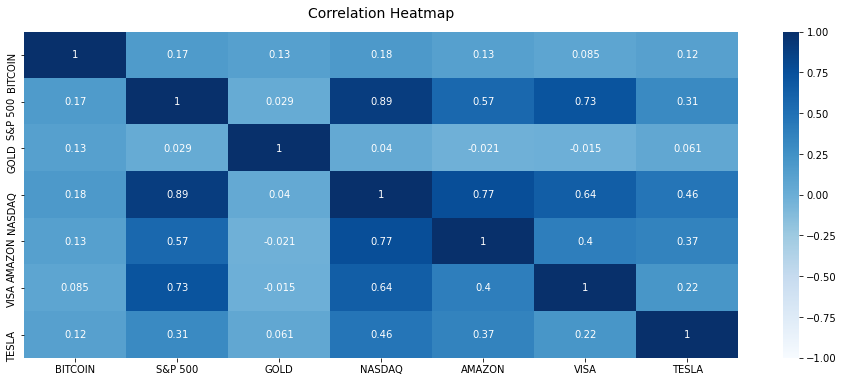

In [23]:
# Create a heatmap from the correlation values
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="Blues")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=14);


In [24]:
# def calculate_correlation(assetA_df,assetB_df):
#   joint_df = pd.merge(assetA_df,assetB_df, left_index=True, right_index=True) #pd.merge combines the two datafames into a single df.
#    correlation = joint_df.iloc[:,1].rolling(180).corr(joint_df.iloc[:,1])
#    return correlation

# correlation_btc_spy = calculate_correlation(btc_returns,spy_returns) 
# correlation_btc_gold = calculate_correlation(btc_returns,gold_returns) 
# correlation_btc_qqq = calculate_correlation(btc_returns, qqq_returns)
# correlation_btc_amzn = calculate_correlation(btc_returns, amzn_returns)
# correlation_btc_v = calculate_correlation(btc_returns, v_returns)
# correlation_btc_tsla = calculate_correlation(btc_returns, tsla_returns)

# print ("The correlation between Bitcoin and GOLD is " + str(correlation_btc_gold.iloc[-1]))
# print ("The correlation between Bitcoin and S&P 500 is " + str(correlation_btc_spy.iloc[-1]))
# print ("The correlation between Bitcoin and NASDAQ (QQQ) is " + str(correlation_btc_qqq.iloc[-1]))
# print ("The correlation between Bitcoin and AMAZON is " + str(correlation_btc_amzn.iloc[-1]))
# print ("The correlation between Bitcoin and VISA is " + str(correlation_btc_v.iloc[-1]))
# print ("The correlation between Bitcoin and TESLA is " + str(correlation_btc_tsla.iloc[-1]))

In [25]:
# Load second Dataset with Corona Cases
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
df_covid = pd.DataFrame.from_dict(json.loads(response.text))
# df_covid = df_covid[df_covid['code'] == 'US']

In [26]:
# add the date column as variable
df_covid["Date"] = pd.to_datetime(df_covid["date"])

# delete some columns that we won't use
df_covid.drop(
    ["day", "month", "year", "country", "code", "population", "date"],
    axis=1,
    inplace=True,
)

# Summarize cases over all countries
df_covid = df_covid.groupby(["Date"]).sum()
df_covid.head()

,cases,deaths,cases_cum,deaths_cum
Date,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0


In [27]:
#2 Load the Stock Market Data

df_covid_new = df_covid.copy()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2020-01-01"
asset_dict = {
    "^GSPC": "SP500",
    "QQQ": "NASDAQ",
    "^N225": " Nikkei 225 Index",
    "^VIX": "Volatility Index",
    "TSM": "Taiwan Semiconductor",
    "INTC": "Intel",
    "NVDA": "Nvidia",
    "AMD": "AMD",
    "AAL": "America nAirlines",
    "UAL": "United Airlines",
    "AMZN": "Amazon",
    "GOOG": "Google",
    "TSLA": "Tesla",
    "GME": "GameStop",
    "BTC-USD": "BTC / USD",
    "ETH-USD": "ETH / USD",
    "XRP-USD": "XRP / USD",
    "CL=F": "Oil",
    "GC=F": "Gold",
    "ZB=F": "US Treasury Bond",
    "USDCAD=X": "USD / CAD",
    "USDEUR=X": "USD / EUR",
    }

col_list = []
# Join the dataframes
for key, value in asset_dict.items():
    print(key, value)    
    try:
        df_temp = web.DataReader(
            key, start=start_date, end=today_date, data_source="yahoo")
    except ValueError: 
        print(f' {key} symbol not found')
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index) 
    df_temp.rename(columns={"Close": value}, inplace=True) # Rename Close Column       
    df_covid_new = pd.merge(
        left=df_covid_new,
        right=df_temp[value],
        how="inner",
        left_index=True, right_index=True)     

df_covid_new.head()

^GSPC SP500
QQQ NASDAQ
^N225  Nikkei 225 Index
^VIX Volatility Index
TSM Taiwan Semiconductor
INTC Intel
NVDA Nvidia
AMD AMD
AAL America nAirlines
UAL United Airlines
AMZN Amazon
GOOG Google
TSLA Tesla
GME GameStop
BTC-USD BTC / USD
ETH-USD ETH / USD
XRP-USD XRP / USD
CL=F Oil
GC=F Gold
ZB=F US Treasury Bond
USDCAD=X USD / CAD
USDEUR=X USD / EUR


,cases,deaths,cases_cum,deaths_cum,SP500,NASDAQ,Nikkei 225 Index,Volatility Index,Taiwan Semiconductor,Intel,...,Tesla,GameStop,BTC / USD,ETH / USD,XRP / USD,Oil,Gold,US Treasury Bond,USD / CAD,USD / EUR
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0,0,59,0,3246.280029,215.559998,23204.859375,13.85,57.389999,59.930000,...,90.307999,5.85,7769.219238,144.304153,0.221510,63.270000,1566.199951,157.84375,1.29866,0.895900
2020-01-07,0,0,59,0,3237.179932,215.529999,23575.720703,13.79,58.320000,58.930000,...,93.811996,5.52,8163.692383,143.543991,0.213917,62.700001,1571.800049,157.40625,1.29639,0.893017
2020-01-08,0,0,59,0,3253.050049,217.149994,23204.759766,13.45,58.750000,58.970001,...,98.428001,5.72,8079.862793,141.258133,0.209026,59.610001,1557.400024,156.37500,1.30031,0.896480
2020-01-09,0,0,59,0,3274.699951,218.990005,23739.869141,12.54,59.230000,59.299999,...,96.267998,5.55,7879.071289,138.979202,0.204899,59.560001,1551.699951,156.81250,1.30365,0.899830
2020-01-10,0,0,59,0,3265.350098,218.429993,23850.570312,12.56,58.860001,58.939999,...,95.629997,5.43,8166.554199,143.963776,0.212306,59.040001,1557.500000,157.62500,1.30625,0.900000


ValueError: num must be 1 <= num <= 24, not 25

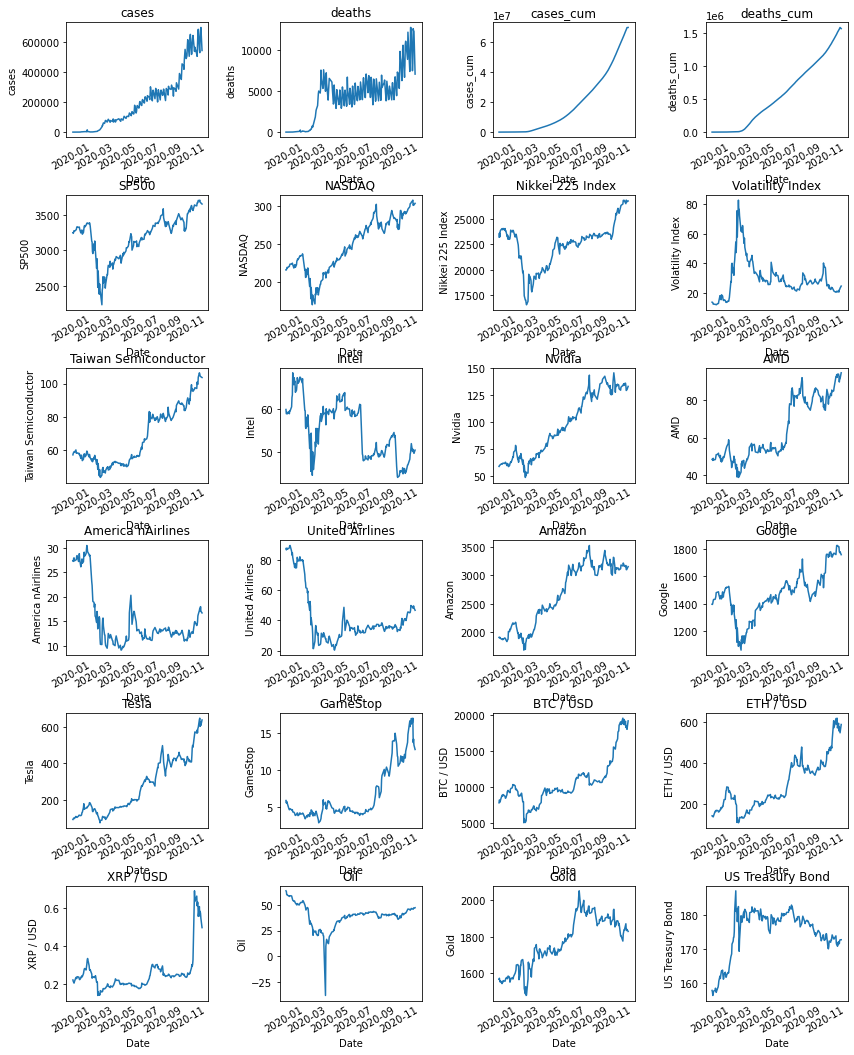

In [28]:
# Plot histograms
df_plot = df_covid_new.copy()

list_length = df_plot.shape[1]
ncols = 4
nrows = int(round(list_length / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(0, list_length):
        ax = plt.subplot(nrows,ncols,i+1)
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.set_title(df_plot.columns[i])
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

In [29]:
# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid_new, columns=col_list)
corr = df_covid_new.corr()
corr

,cases,deaths,cases_cum,deaths_cum,SP500,NASDAQ,Nikkei 225 Index,Volatility Index,Taiwan Semiconductor,Intel,...,Tesla,GameStop,BTC / USD,ETH / USD,XRP / USD,Oil,Gold,US Treasury Bond,USD / CAD,USD / EUR
cases,1.000000,0.864611,0.972534,0.966544,0.658308,0.850802,0.653468,-0.204649,0.914054,-0.695141,...,0.914621,0.866898,0.898681,0.899534,0.614890,0.068974,0.723124,0.149533,-0.515659,-0.836622
deaths,0.864611,1.000000,0.790357,0.818158,0.406786,0.673656,0.404235,-0.068830,0.695275,-0.566903,...,0.747027,0.672038,0.716615,0.732174,0.508495,-0.224141,0.681223,0.397577,-0.203503,-0.635629
cases_cum,0.972534,0.790357,1.000000,0.974024,0.708927,0.863635,0.705397,-0.241341,0.950189,-0.684303,...,0.950099,0.926469,0.924471,0.932216,0.700983,0.138698,0.684349,0.061335,-0.591180,-0.857037
deaths_cum,0.966544,0.818158,0.974024,1.000000,0.706635,0.918145,0.676180,-0.253892,0.942064,-0.684602,...,0.964862,0.864889,0.878374,0.926987,0.609582,0.093528,0.808047,0.197309,-0.551961,-0.895700
SP500,0.658308,0.406786,0.708927,0.706635,1.000000,0.885261,0.956970,-0.803040,0.823821,-0.213171,...,0.766125,0.637814,0.802378,0.796296,0.643321,0.626296,0.549959,-0.360425,-0.922143,-0.732313
NASDAQ,0.850802,0.673656,0.863635,0.918145,0.885261,1.000000,0.813777,-0.539684,0.924819,-0.481509,...,0.937229,0.732698,0.843232,0.911386,0.595334,0.321123,0.826964,0.055641,-0.723111,-0.888372
Nikkei 225 Index,0.653468,0.404235,0.705397,0.676180,0.956970,0.813777,1.000000,-0.785451,0.776856,-0.162643,...,0.718013,0.650625,0.823973,0.755936,0.688112,0.657051,0.424140,-0.437338,-0.907583,-0.667178
Volatility Index,-0.204649,-0.068830,-0.241341,-0.253892,-0.803040,-0.539684,-0.785451,1.000000,-0.397036,-0.277283,...,-0.317067,-0.208787,-0.454009,-0.379669,-0.400678,-0.689413,-0.222113,0.534036,0.738606,0.279920
Taiwan Semiconductor,0.914054,0.695275,0.950189,0.942064,0.823821,0.924819,0.776856,-0.397036,1.000000,-0.665401,...,0.957542,0.849816,0.899770,0.948906,0.694161,0.286648,0.756963,-0.006144,-0.723637,-0.923153
Intel,-0.695141,-0.566903,-0.684303,-0.684602,-0.213171,-0.481509,-0.162643,-0.277283,-0.665401,1.000000,...,-0.629943,-0.554835,-0.506362,-0.622963,-0.287516,0.147729,-0.625223,-0.353056,0.205353,0.717283


<ipython-input-30-f04d28243730>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

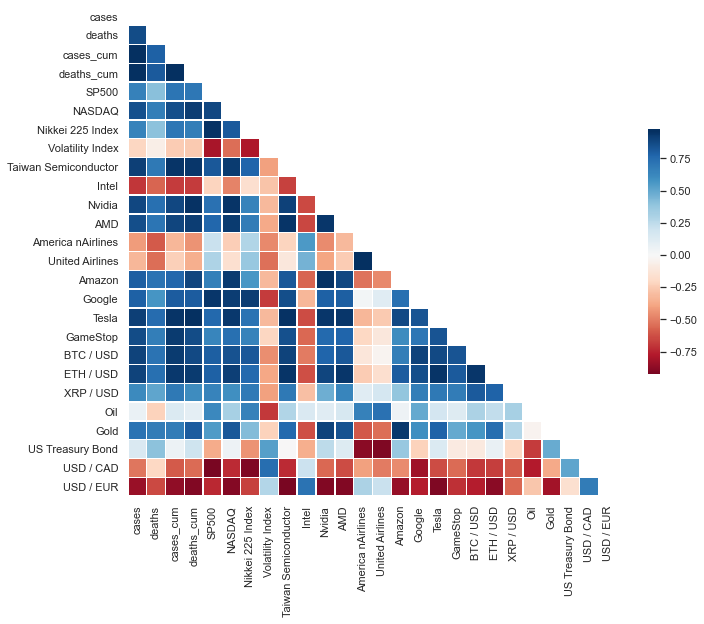

In [30]:
#4 Visualizing the Matrix as a Heatpmap
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)